In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = 10,7
warnings.filterwarnings('ignore') 
np.random.seed(0)

In [ ]:
test = pd.read_csv('test1.csv')
train = pd.read_csv('train1.csv')


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
range_class = np.arange(10)
y = np.asfarray(train.iloc[:,0])
train_x = train.iloc[:,1:].values
train_y = np.array([(range_class==label).astype(np.int) for label in y])
print(train_y)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
test_x = test.values
print(test)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...       0.0       0.0       0.0       0.0
1           0       0       0       0  ...       0.0       0.0       0.0       0.0
2           0       0       0       0  ...       0.0       0.0       0.0       0.0
3           0       0       0       0  ...       0.0       0.0       0.0       0.0
4           0       0       0       0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
21826       0       0       0       0  ...       0.0       0.0       0.0       0.0
21827       0       0       0       0  ...       0.0       0.0       0.0       0.0
21828       0       0       0       0  ...       0.0       0.0       0.0       0.0
21829       0       0       0       0  ...       0.0       0.0       0.0       0.0
21830       0       0       0       0  ...       NaN       NaN       NaN       NaN

[21

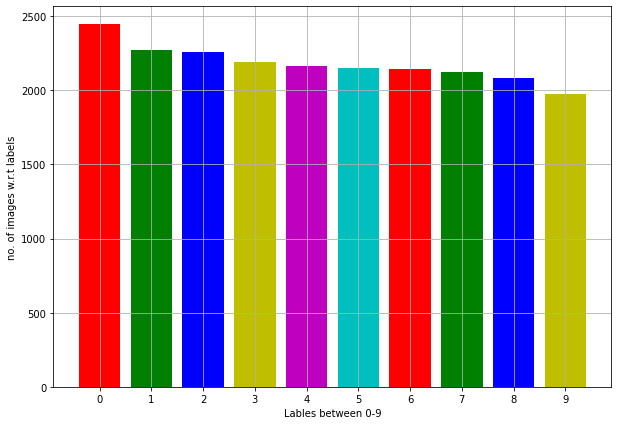

In [ ]:
y = train.iloc[:,0].value_counts()
x = range(len(y))
plt.bar(x, y, color='rgbymc')
plt.xticks(x, x)
plt.ylabel('no. of images w.r.t labels')
plt.xlabel('Lables between 0-9')
plt.grid()


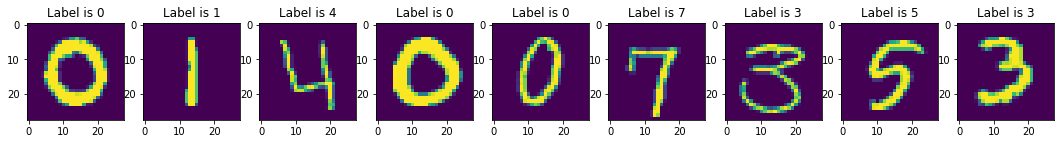

In [ ]:
figure = plt.figure()


figure.set_size_inches(20.5, 8.5)

for itr in range(1, 10):
    plt.subplot(1, 10, itr)
    label = train.loc[itr,'label']
    pixels = train.iloc[itr,1:].values.reshape((28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)

plt.show()


In [ ]:
train_x = train_x / 255.
test_x  = test_x  / 255.


In [ ]:
shape_x = train_x.shape
shape_y = train_y.shape
m = train_y.shape[0]
print('the shape of X is' + str(shape_x))
print('the shape of Y is' + str(shape_y))
print('I have m = %d training examples!' % (m))


the shape of X is(21799, 784)
the shape of Y is(21799, 10)
I have m = 21799 training examples!


In [ ]:
def layer_size(X, Y):
  n_x = X.shape[1]
  n_h = 4
  n_y = Y.shape[1]
  return (n_x, n_h, n_y)

In [ ]:
def initialise_parameter(n_x, n_h, n_y):
    
    np.random.seed(0)
    
    W1 = np.random.randn(n_h[0], n_x) * 0.1
    b1 = np.zeros(shape=(n_h[0], 1))
    
    W2 = np.random.randn(n_h[1], n_h[0]) * 0.1
    b2 = np.zeros(shape=(n_h[1], 1))
    
    W3 = np.random.randn(n_y, n_h[1]) * 0.1
    b3 = np.zeros(shape=(n_y, 1))
    
    assert(W1.shape == (n_h[0], n_x))
    assert(b1.shape == (n_h[0], 1))

    assert(W2.shape == (n_h[1], n_h[0]))
    assert(b2.shape == (n_h[1], 1))
    
    assert(W3.shape == (n_y, n_h[1]))
    assert(b3.shape == (n_y, 1))
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


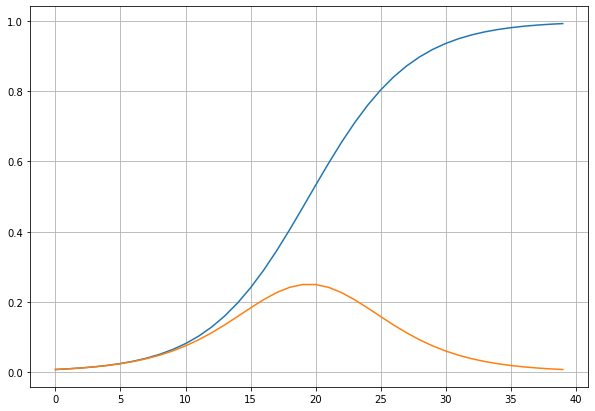

In [ ]:
_x = np.linspace(-5, 5, 40)

plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))

plt.grid()


In [ ]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = (np.dot(W1, X.T) + b1).T
    A1 = sigmoid(Z1)
    Z2 = (np.dot(W2, A1.T) + b2).T
    A2 = sigmoid(Z2)
    Z3 = (np.dot(W3, A2.T) + b3).T
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (X.shape[0], 10))
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
        "Z3" : Z3,
        "A3" : A3
    }

    return A3, cache


In [ ]:
def compute_cost(A3, Y):
    
    m = Y.shape[0] 
    
    logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost


In [ ]:
def backward_propagation(parameters, cache, X, Y):
    
    m = Y.shape[0]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    dZ3 = (A3 - Y)
    dW3 = (1 / m) * np.dot(dZ3.T, A2)
    db3 = (1 / m) * np.sum(dZ3, keepdims=True)

    dZ2 = np.multiply(np.dot(dZ3, W3), sigmoid_derivative(A2))
    dW2 = (1 / m) * np.dot(dZ2.T, A1)
    db2 = (1 / m) * np.sum(dZ2, keepdims=True)
    
    dZ1 = np.multiply(np.dot(dZ2, W2), sigmoid_derivative(A1))
    dW1 = (1 / m) * np.dot(dZ1.T, X)
    db1 = (1 / m) * np.sum(dZ1, keepdims=True)
    
    grads = {"dW1": dW1, 
             "db1": db1, 
             "dW2": dW2, 
             "db2": db2, 
             "dW3": dW3, 
             "db3": db3
            }
    
    return grads


In [ ]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters


In [ ]:
def predict(X, parameters):
    
    m = X.shape[0]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A3, cache = forward_propagation(X, parameters)
    
    return A3


In [ ]:
def nn_model(X, Y, n_h, learning_rate, num_iterations, print_cost=False):

    np.random.seed(3)

    cost_per_iter = []
    
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    # Initialize parameters
    parameters = initialise_parameter(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3, Y)
 
        cost_per_iter.append(cost)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    train_prediction = (train.iloc[:,0].values != np.array(predict(train_x, parameters).argmax(axis=1)).T).astype(int)

    test_prediction = np.vstack((np.arange(1, 21832), predict(test_x, parameters).argmax(axis=1).T)).T
    data_to_submit = pd.DataFrame(test_prediction, columns = ['ImageId','Label']) 
    
    print("train accuracy: {} %".format(100 - np.mean(train_prediction) * 100))
    
    output = {
        "cost" : cost_per_iter[-1],
        "parameters" : parameters,
        "cost_per_iter" : cost_per_iter,
        "train_prediction" : train_prediction,
        "test_prediction" : test_prediction,
        "data_to_submit" : data_to_submit
    }
    
    return output


learning rate is: 2.1
train accuracy: 9.725216753062071 %
Cost is: nan
-------------------------------------------------------



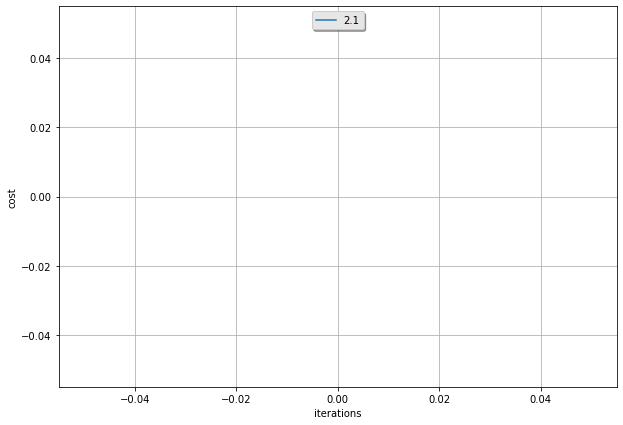

In [ ]:
models = {}
learning_rates = [2.1]

for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = nn_model(train_x, train_y, n_h = [400, 40], learning_rate = i, num_iterations = 1500, print_cost=False)
    print ("Cost is: " + str(models[str(i)]["cost"]))
    print ("-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["cost_per_iter"]), label= str(i))

plt.ylabel('cost')
plt.xlabel('iterations')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid()
plt.show()
